本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

# 50. データの入手・整形
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
抽出された事例をランダムに並び替える．
抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．


In [193]:
!cat ../NewsAggregatorDataset/readme.txt

SUMMARY: Dataset of references (urls) to news web pages

DESCRIPTION: Dataset of references to news web pages collected from an online aggregator in the period from March 10 to August 10 of 2014. The resources are grouped into clusters that represent pages discussing the same news story. The dataset includes also references to web pages that point (has a link to) one of the news page in the collection.

TAGS: web pages, news, aggregator, classification, clustering

LICENSE: Public domain - Due to restrictions on content and use of the news sources, the corpus is limited to web references (urls) to web pages and does not include any text content. The references have been retrieved from the news aggregator through traditional web browsers. 

FILE ENCODING: UTF-8

FORMAT: Tab delimited CSV files. 

DATA SHAPE AND STATS: 422937 news pages and divided up into:

152746 	news of business category
108465 	news of science and technology category
115920 	news of business category
 45615 	news of

In [194]:
! head -n3 ../NewsAggregatorDataset/newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550


In [1]:
import pandas as pd
header = [
    "ID",
    "TITLE",
    "URL",
    "PUBLISHER",
    "CATEGORY",
    "STORY",
    "HOSTNAME",
    "TIMESTAMP",
]
df = pd.read_csv("../NewsAggregatorDataset/newsCorpora.csv", delimiter="\t", names=header)
df.head(3)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550


In [2]:
target_publisher = [
    "Reuters", 
    "Huffington Post", 
    "Businessweek", 
    "Contactmusic.com", 
    "Daily Mail",
]

df = df[df["PUBLISHER"].isin(target_publisher)]

In [3]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=0)
valid_df, test_df = train_test_split(temp_df, train_size=0.5, shuffle=True, random_state=0)

In [198]:
print(f"df: {len(df)}, train: {len(train_df)}, test: {len(test_df)}, valid: {len(valid_df)}")

df: 13340, train: 10672, test: 1334, valid: 1334


In [4]:
target_columns = [
    "CATEGORY",
    "TITLE",
]
train_df = train_df[target_columns]
test_df = test_df[target_columns]
valid_df = valid_df[target_columns]

In [200]:
train_df.head()

,CATEGORY,TITLE
348313,b,Janet Yellen Stakes Out Position On Fighting F...
107102,e,UPDATE 1-Outkast goes back to 1990s hip hop at...
421630,e,Justin Bieber gets rear-ended in his $230000 F...
369699,e,Katie Holmes - Katie Holmes in awe of 'spectac...
84213,b,"Holcim, Lafarge Said to Approve Merger With La..."


In [201]:
with open("../output/train.txt", mode="w") as f_train:
    train_df.to_csv(f_train, header=None, index=None, sep="\t")
    
with open("../output/test.txt", mode="w") as f_test:
    test_df.to_csv(f_test, header=None, index=None, sep="\t")
    
with open("../output/valid.txt", mode="w") as f_valid:
    valid_df.to_csv(f_valid, header=None, index=None, sep="\t")

# 51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_df["title_length"] =train_df["TITLE"].map(len)
test_df["title_length"] =test_df["TITLE"].map(len)
valid_df["title_length"] =valid_df["TITLE"].map(len)

train_df["is_title_case"] = train_df["TITLE"].str.istitle().map(int)
test_df["is_title_case"] = test_df["TITLE"].str.istitle().map(int)
valid_df["is_title_case"] = valid_df["TITLE"].str.istitle().map(int)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

vec_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2))
train_valid = df[:len(train_df) + len(valid_df)]

tfidf_train_valid = vec_tfidf.fit_transform(train_valid["TITLE"])
tfidf_test = vec_tfidf.transform(test_df["TITLE"])

tfidf_train_valid = pd.DataFrame(tfidf_train_valid.toarray(), columns=vec_tfidf.get_feature_names())
tfidf_test = pd.DataFrame(tfidf_test.toarray(), columns=vec_tfidf.get_feature_names()).reset_index(drop=True)

tfidf_train = tfidf_train_valid[:len(train_df)].reset_index(drop=True)
tfidf_valid = tfidf_train_valid[len(train_df):].reset_index(drop=True)
# News category (b = business, t = science and technology, e = entertainment, m = health)

In [6]:
train_df = pd.concat([train_df, tfidf_train], axis=1).drop(columns=["TITLE"])
test_df = pd.concat([test_df, tfidf_test], axis=1).drop(columns=["TITLE"])
valid_df = pd.concat([valid_df, tfidf_valid], axis=1).drop(columns=["TITLE"])

In [ ]:
with open("../output/train.feature.txt", mode="w") as f_train:
    train_df.to_csv(f_train, header=True, index=None, sep="\t")
    
with open("../output/test.feature.txt", mode="w") as f_test:
    test_df.to_csv(f_test, header=True, index=None, sep="\t")
    
with open("../output/valid.feature.txt", mode="w") as f_valid:
    valid_df.to_csv(f_valid, header=True, index=None, sep="\t")


# 52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．


In [207]:
print(len(train_df))

10672


train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
valid_df.dropna(inplace=True)
len(train_df)

In [7]:
from sklearn.linear_model import LogisticRegression

X_train = train_df.drop(columns=["CATEGORY"])
y_train = train_df["CATEGORY"]
X_test = test_df.drop(columns=["CATEGORY"])
y_test = test_df["CATEGORY"]
X_valid = valid_df.drop(columns=["CATEGORY"])
y_valid = valid_df["CATEGORY"]


lg = LogisticRegression(random_state=0, max_iter=10000)
lg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# 53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．


In [8]:
import numpy as np

def score_lg(lg, X):
  return [np.max(lg.predict_proba(X), axis=1), lg.predict(X)]

train_pred = score_lg(lg, X_train)
test_pred = score_lg(lg, X_test)



# 54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．


In [1]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train_df["CATEGORY"], train_pred[1])
test_accuracy = accuracy_score(test_df["CATEGORY"], test_pred[1])
print(f"accuracy(train): {train_accuracy:.3f}")
print(f"accuracy(test): {test_accuracy:.3f}")

NameError: name 'train_df' is not defined


# 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 学習データ
train_cm = confusion_matrix(train_df['CATEGORY'], train_pred[1])
print(train_cm)
sns.heatmap(train_cm, annot=True, cmap='Blues')
plt.show()


In [ ]:
test_cm = confusion_matrix(test_df['CATEGORY'], test_pred[1])
print(test_cm)
sns.heatmap(test_cm, annot=True, cmap='Blues')
plt.show()

Error: Session cannot generate requests


# 56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．


In [215]:
from sklearn.metrics import precision_score, recall_score, f1_score

true = y_test
pred = test_pred[1]

precision = precision_score(true, pred, average=None, labels=['b', 'e', 't', 'm']) 
precision = np.append(precision, precision_score(true, pred, average='micro'))
precision = np.append(precision, precision_score(true, pred, average='macro'))

recall = recall_score(true, pred, average=None, labels=['b', 'e', 't', 'm']) 
recall = np.append(recall, recall_score(true, pred, average='micro'))
recall = np.append(recall, recall_score(true, pred, average='macro'))


f1 = f1_score(true, pred, average=None, labels=['b', 'e', 't', 'm']) 
f1 = np.append(f1, f1_score(true, pred, average='micro'))
f1 = np.append(f1, f1_score(true, pred, average='macro'))

scores = pd.DataFrame({'適合率': precision, '再現率': recall, 'F1スコア': f1},
                        index=['b', 'e', 't', 'm', 'マイクロ平均', 'マクロ平均'])

print(scores)

/Users/kanjyuhayashi/pluszero/rck-job-disc/rck-job-disc/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kanjyuhayashi/pluszero/rck-job-disc/rck-job-disc/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


             適合率       再現率     F1スコア
b       0.552595  0.690018  0.613707
e       0.526917  0.632094  0.574733
t       0.250000  0.011561  0.022099
m       0.000000  0.000000  0.000000
マイクロ平均  0.538981  0.538981  0.538981
マクロ平均   0.332378  0.333418  0.302635



# 57. 特徴量の重みの確認
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．


In [220]:
features = X_train.columns.values

for c, coef in zip(lg.classes_, lg.coef_):
    print("category:", c)
    print(" best 10\n", [features[idx]for idx in np.argsort(coef)[::-1][:10]])
    print(" worst 10\n", [features[idx]for idx in np.argsort(coef)[:10]])
    print()

category: b
 best 10
 ['open', 'cloud', 'per', 'run', 'finally', 'action', 'second', 'solar', 'selfie', 'almost']
 worst 10
 ['weight', 'increase', 'crude', 'is_title_case', 'keep', 'happy', 'piketty', 'keeps', 'fcc', 'leave']

category: e
 best 10
 ['helped', 'singer', 'fuel', 'team', 'for new', 'dream', 'euro', 'half', 'shower', 'billion']
 worst 10
 ['run', 'father', 'security', 'give', 'and the', 'worth', 'cloud', 'breast', 'ackman', 'rapper']

category: m
 best 10
 ['and the', 'ap', 'merger', 'spending', '50', 'bill', 'boe', 'add', 'rallies', 'as ecb']
 worst 10
 ['oil', 'west', 'japan', 'two', 'has', 'billion', 'by', 'could', 'kanye west', 'not']

category: t
 best 10
 ['years after', 'time', 'sanctions', 'live', 'big', 'tied', 'cable', 'will', 'nbc', 'sets']
 worst 10
 ['second', 'prices', 'rpt', 'still', 'samsung', 'last', 'wants', 'williams', 'lawsuit', 'lost']




# 58. 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．


In [227]:
from tqdm import tqdm

result = []
for C in tqdm(np.logspace(-3, 2, 6, base=10)):
    lg = LogisticRegression(random_state=0, max_iter=10000, C=C)
    lg.fit(X_train, y_train)
    train_pred = score_lg(lg, X_train)
    valid_pred = score_lg(lg, X_valid)
    test_pred = score_lg(lg, X_test)
    train_accuracy = accuracy_score(y_train, train_pred[1])
    test_accuracy = accuracy_score(y_test, test_pred[1])
    valid_accuracy = accuracy_score(y_valid, valid_pred[1])
    result.append([C, train_accuracy, valid_accuracy, test_accuracy])

100%|██████████| 6/6 [26:57<00:00, 269.64s/it]


In [228]:
result

[[0.001, 0.5751499250374813, 0.6011994002998501, 0.5832083958020989],
 [0.01, 0.5948275862068966, 0.6206896551724138, 0.6019490254872564],
 [0.1, 0.6106634182908546, 0.6146926536731634, 0.5899550224887556],
 [1.0, 0.6354010494752623, 0.5652173913043478, 0.5389805097451275],
 [10.0, 0.7026799100449775, 0.49025487256371814, 0.47226386806596704],
 [100.0, 0.7528110944527736, 0.4287856071964018, 0.4302848575712144]]

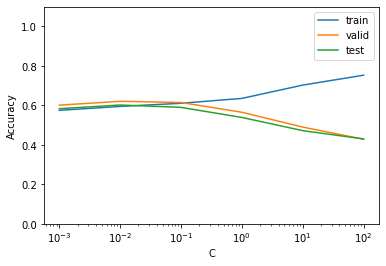

In [229]:
result = np.array(result).T
x = result[0]
y = result[1:]
plt.plot(x, y[0], label="train")
plt.plot(x, y[1], label="valid")
plt.plot(x, y[2], label="test")
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.xscale ('log')
plt.xlabel('C')
plt.legend()
plt.show()


# 59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [2]:
!pip install optuna

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - optuna

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [232]:
import optuna

def objective(trial):
    l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
    C = trial.suggest_loguniform('C', 1e-4, 1e1)

    lg = LogisticRegression(random_state=0, 
                          max_iter=10000, 
                          penalty='elasticnet', 
                          solver='saga', 
                          l1_ratio=l1_ratio, 
                          C=C)
    lg.fit(X_train, y_train)
    valid_pred = score_lg(lg, X_valid)
    valid_accuracy = accuracy_score(y_valid, valid_pred[1])
    return valid_accuracy 

In [233]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=3600)
print('Best trial:')
trial = study.best_trial
print('  Value: {:.3f}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2021-08-23 12:17:26,236] A new study created in memory with name: no-name-c40497af-d181-4fdf-81b7-d640ef69abdd


In [ ]:
l1_ratio = trial.params['l1_ratio']
C = trial.params['C']

lg = LogisticRegression(random_state=0, 
                        max_iter=10000, 
                        penalty='elasticnet', 
                        solver='saga', 
                        l1_ratio=l1_ratio, 
                        C=C)
lg.fit(X_train, y_train)

# 予測値の取得
train_pred = score_lg(lg, X_train)
valid_pred = score_lg(lg, X_valid)
test_pred = score_lg(lg, X_test)

# 正解率の算出
train_accuracy = accuracy_score(y_train, train_pred[1]) 
valid_accuracy = accuracy_score(y_valid, valid_pred[1]) 
test_accuracy = accuracy_score(y_test, test_pred[1]) 

print(f'accuracy(train): {train_accuracy:.3f}')
print(f'accuracy(valid): {valid_accuracy:.3f}')
print(f'accuracy(test): {test_accuracy:.3f}')